# KARTHIK SANKHAR V (21MIA152) Assignment - 3

##  Perform the below Tasks to complete the Assignment:-
##  Clustering the data and performing classification algorithms

## 1. Download the dataset: https://drive.google.com/file/d/1AvRp8hOK-O76WIFvPj_rk10fAZbt8nWH/view

In [1]:
pwd

'c:\\Users\\shank\\VS CODE\\AI & ML WITH DS GOOGLE'

In [2]:
ls

 Volume in drive C is OS
 Volume Serial Number is 8642-70B7

 Directory of c:\Users\shank\VS CODE\AI & ML WITH DS GOOGLE

14-09-2023  19:26    <DIR>          .
12-09-2023  17:42    <DIR>          ..
08-09-2023  18:08             5,216 50_Startups.csv
14-09-2023  19:27           810,979 A3 copy.ipynb
12-09-2023  20:09           819,951 A3.ipynb
10-09-2023  18:09           201,998 class.ipynb
12-09-2023  20:10           109,150 class1.ipynb
14-09-2023  18:17                 0 class3.ipynb
10-09-2023  18:09         1,039,154 Data_Preprocessing (1) (1).ipynb
27-03-2023  06:22         1,524,561 House Price India.csv
09-09-2023  23:32               727 imputing missing values with the dtype.txt
07-09-2023  18:12            55,628 insurance (1).csv
05-09-2023  20:46            15,514 KARTHIK SANKHAR V 21MIA1152 ASSIGNMENT - 1.ipynb
05-09-2023  21:00        10,730,135 KARTHIK SANKHAR V 21MIA1152 ASSIGNMENT - 2.ipynb
07-09-2023  17:12               261 Label encoding.txt
07-09-2023  16:52      

NOTE: As insturcted the data set 'penguins_size.csv' is downloaded

## Importing Libraries

In [3]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

## 2. Load the dataset into the tool.

In [4]:
df = p.read_csv(r"C:\Users\shank\VS CODE\AI & ML WITH DS GOOGLE\penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Data preprocessing

In [5]:
df.shape

(344, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


NOTE: As from the above code we can see that there 3 colummns containing 'object' dtype and 4 columns containing 'float64' in the dataset

In [7]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

NOTE: As we can see that there are missing values in the columns 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'

## 5. Check for Missing values and deal with them.

In [9]:
col = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in col:
    df[i].fillna(df[i].median(), inplace=True)

In [10]:
df.sex.fillna(df.sex.mode()[0], inplace= True)

In [11]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

NOTE: As we can see from the above cell all the missing values are imputed

In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


## Checking for the irrelevant data or values in the dataset

In [13]:
c = ['species', 'island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in c:
    a = df[i].unique()
    print(a,'\n')

['Adelie' 'Chinstrap' 'Gentoo'] 

['Torgersen' 'Biscoe' 'Dream'] 

['MALE' 'FEMALE' '.'] 

[39.1  39.5  40.3  44.45 36.7  39.3  38.9  39.2  34.1  42.   37.8  41.1
 38.6  34.6  36.6  38.7  42.5  34.4  46.   37.7  35.9  38.2  38.8  35.3
 40.6  40.5  37.9  37.2  40.9  36.4  42.2  37.6  39.8  36.5  40.8  36.
 44.1  37.   39.6  37.5  42.3  40.1  35.   34.5  41.4  39.   35.7  41.3
 41.6  35.5  41.8  33.5  39.7  45.8  42.8  36.2  42.1  42.9  35.1  37.3
 36.3  36.9  38.3  34.   38.1  33.1  43.2  41.   45.6  42.7  40.2  35.2
 41.5  38.5  43.1  36.8  35.6  32.1  40.7  46.5  50.   51.3  45.4  52.7
 45.2  46.1  46.6  51.7  47.   52.   45.9  50.5  50.3  58.   46.4  49.2
 42.4  48.5  50.6  46.7  49.5  52.8  54.2  51.   49.7  47.5  47.6  46.9
 53.5  49.   46.2  50.9  45.5  50.8  50.1  51.5  49.8  48.1  51.4  45.7
 50.7  52.2  49.3  50.2  51.9  46.8  55.8  43.5  49.6  48.7  43.3  48.4
 45.1  46.3  44.5  47.8  48.2  47.3  59.6  49.1  42.6  44.4  44.   45.3
 43.6  44.9  45.   43.8  50.4  54.3  47.7  48.

NOTE: From the above cell we can observe that in the feature 'sex' there is a '.' character which irrelevent to the dataset and the column

## Replacing the irrelevent character from the column

In [14]:
df['sex'] = df['sex'].replace('.',df.sex.fillna(df.sex.mode()[0], inplace= True))

In [15]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.30,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.90,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.20,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.10,18.1,193.0,3475.0,MALE
9,Adelie,Torgersen,42.00,20.2,190.0,4250.0,MALE


In [16]:
c = ['species', 'island', 'sex', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i in c:
    a = df[i].unique()
    print(a,'\n')

['Adelie' 'Chinstrap' 'Gentoo'] 

['Torgersen' 'Biscoe' 'Dream'] 

['MALE' 'FEMALE' None] 

[39.1  39.5  40.3  44.45 36.7  39.3  38.9  39.2  34.1  42.   37.8  41.1
 38.6  34.6  36.6  38.7  42.5  34.4  46.   37.7  35.9  38.2  38.8  35.3
 40.6  40.5  37.9  37.2  40.9  36.4  42.2  37.6  39.8  36.5  40.8  36.
 44.1  37.   39.6  37.5  42.3  40.1  35.   34.5  41.4  39.   35.7  41.3
 41.6  35.5  41.8  33.5  39.7  45.8  42.8  36.2  42.1  42.9  35.1  37.3
 36.3  36.9  38.3  34.   38.1  33.1  43.2  41.   45.6  42.7  40.2  35.2
 41.5  38.5  43.1  36.8  35.6  32.1  40.7  46.5  50.   51.3  45.4  52.7
 45.2  46.1  46.6  51.7  47.   52.   45.9  50.5  50.3  58.   46.4  49.2
 42.4  48.5  50.6  46.7  49.5  52.8  54.2  51.   49.7  47.5  47.6  46.9
 53.5  49.   46.2  50.9  45.5  50.8  50.1  51.5  49.8  48.1  51.4  45.7
 50.7  52.2  49.3  50.2  51.9  46.8  55.8  43.5  49.6  48.7  43.3  48.4
 45.1  46.3  44.5  47.8  48.2  47.3  59.6  49.1  42.6  44.4  44.   45.3
 43.6  44.9  45.   43.8  50.4  54.3  47.7  48

NOTE: From the above cell we can observe that the character is removed and replaced with mode of the column

## 3. Perform Below Visualizations.
    ● Univariate Analysis
    ● Bi- Variate Analysis
    ● Multi-Variate Analysis

### Univariate Analysis

C:\Users\shank\AppData\Local\Temp\ipykernel_24976\1101064328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_length_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

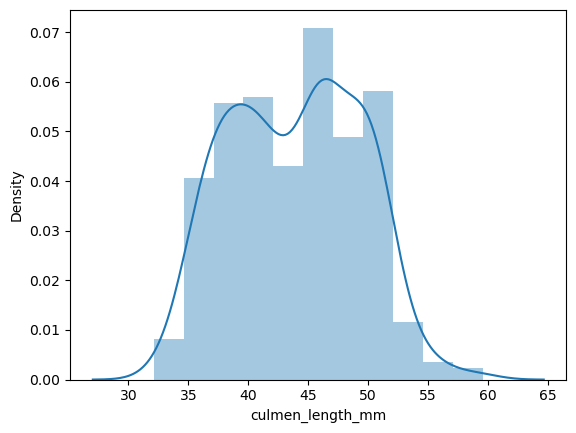

In [17]:
sns.distplot(df['culmen_length_mm'])

C:\Users\shank\AppData\Local\Temp\ipykernel_24976\1542393613.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_depth_mm'])


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

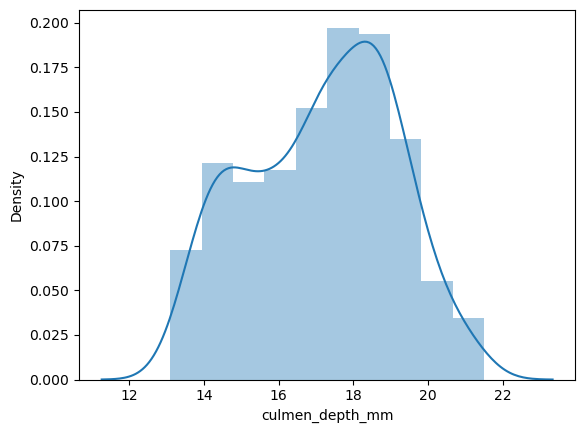

In [18]:
sns.distplot(df['culmen_depth_mm'])

C:\Users\shank\AppData\Local\Temp\ipykernel_24976\2376148029.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['flipper_length_mm'])


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

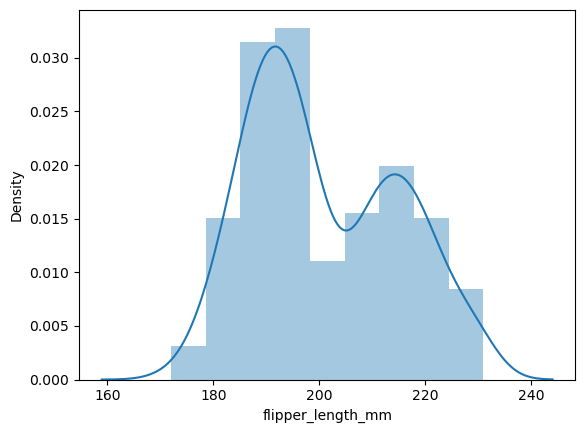

In [19]:
sns.distplot(df['flipper_length_mm'])

C:\Users\shank\AppData\Local\Temp\ipykernel_24976\2151326810.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

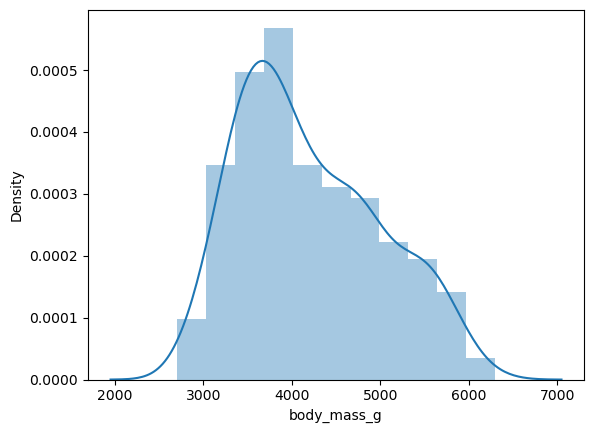

In [20]:
sns.distplot(df['body_mass_g'])

### Bi- Variate Analysis

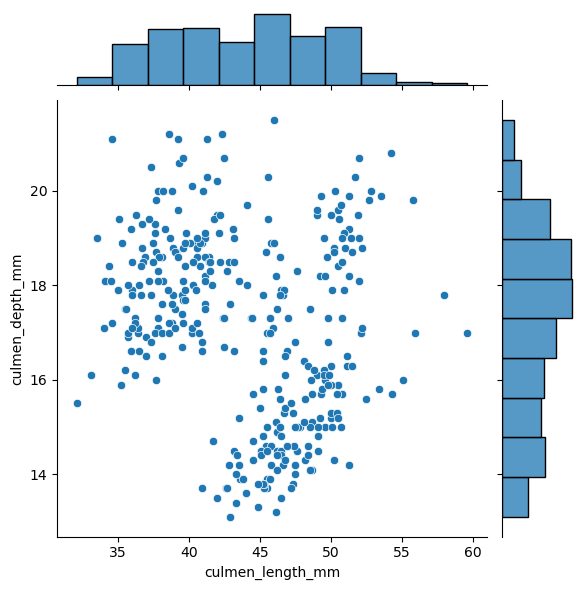

In [21]:
sns.jointplot(x = df['culmen_length_mm'], y = df['culmen_depth_mm'])

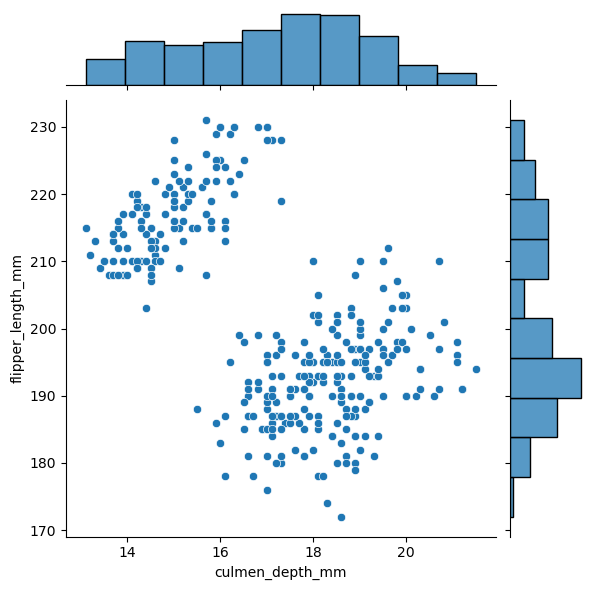

In [22]:
sns.jointplot(x = df['culmen_depth_mm'], y = df['flipper_length_mm'])

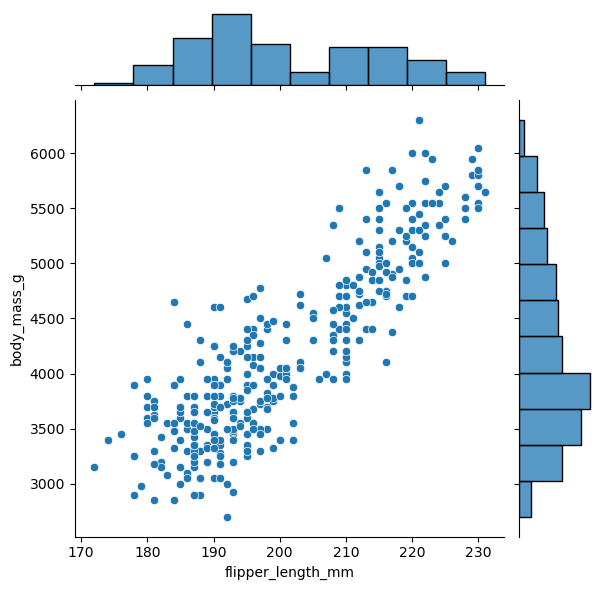

In [23]:
sns.jointplot(x = df['flipper_length_mm'], y = df['body_mass_g'])

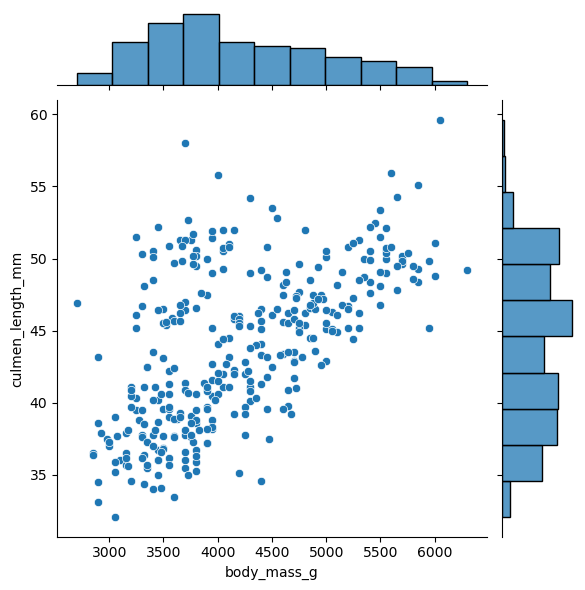

In [24]:
sns.jointplot(x = df['body_mass_g'], y = df['culmen_length_mm'])

### Multi-Variate Analysis

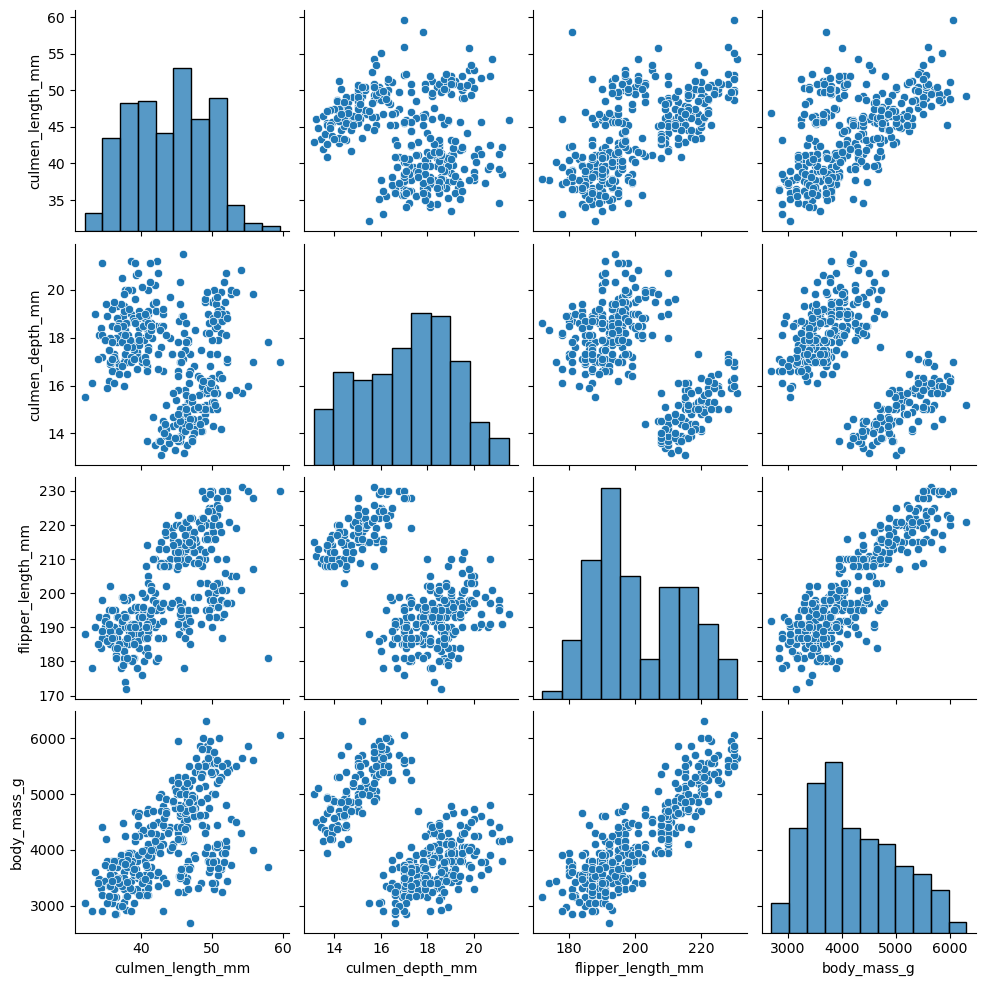

In [25]:
sns.pairplot(df)

## 4. Perform descriptive statistics on the dataset.

In [26]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.925000,17.152035,200.892442,4200.872093
std,5.443792,1.969060,14.023826,799.696532
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## 6. Find the outliers and replace them outliers

<Axes: >

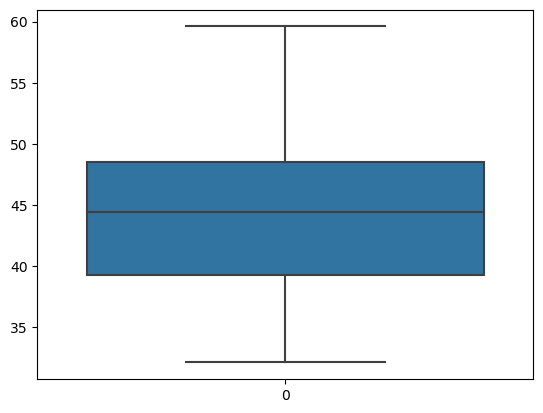

In [27]:
sns.boxplot(df['culmen_length_mm'])

<Axes: >

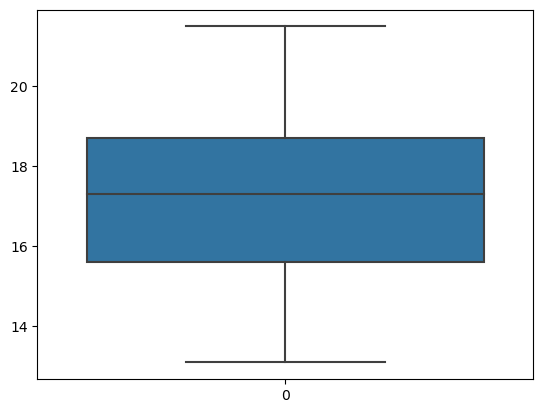

In [28]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

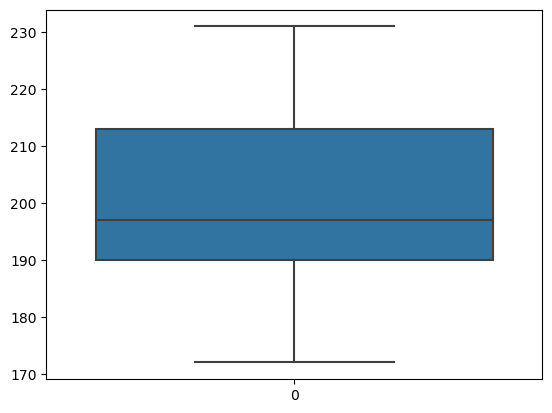

In [29]:
sns.boxplot(df['flipper_length_mm'])

<Axes: >

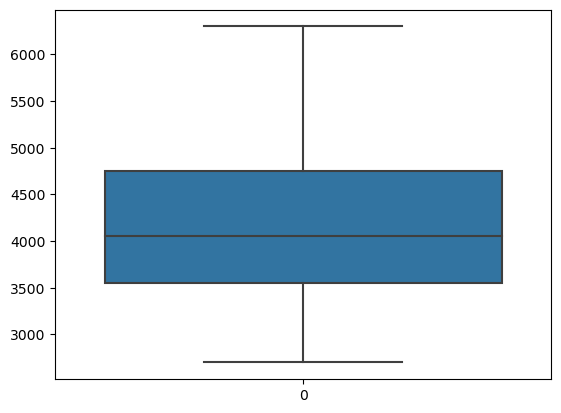

In [30]:
sns.boxplot(df['body_mass_g'])

NOTE: From the above boxplots of all the columns containing dtype 'float64' we can observe there is no outliers.

In [31]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


## 8. Check for Categorical columns and perform encoding.

In [32]:
l = LabelEncoder()

In [33]:
cl = ['species', 'island', 'sex']
for i in cl:
    df[i] = l.fit_transform(df[i])

In [34]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


NOTE: From the above cell we can observe that all the categorical columns are encoded.

## 7.Check the correlation of independent variables with the target

In [35]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728706,-0.741282,0.850819,0.747547,0.017100
island,-0.635659,1.000000,-0.351189,0.567701,-0.562957,-0.558500,-0.002399
culmen_length_mm,0.728706,-0.351189,1.000000,-0.235000,0.655858,0.594925,0.319863
culmen_depth_mm,-0.741282,0.567701,-0.235000,1.000000,-0.583832,-0.471942,0.346567
flipper_length_mm,0.850819,-0.562957,0.655858,-0.583832,1.000000,0.871221,0.245848
body_mass_g,0.747547,-0.558500,0.594925,-0.471942,0.871221,1.000000,0.407404
sex,0.017100,-0.002399,0.319863,0.346567,0.245848,0.407404,1.000000


In [36]:
df.corr().species.sort_values(ascending =False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.017100
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

NOTE: From the above cell we can observe that the feature 'flipper_length_mm' is highly correlated with target variable 'species'

<Axes: >

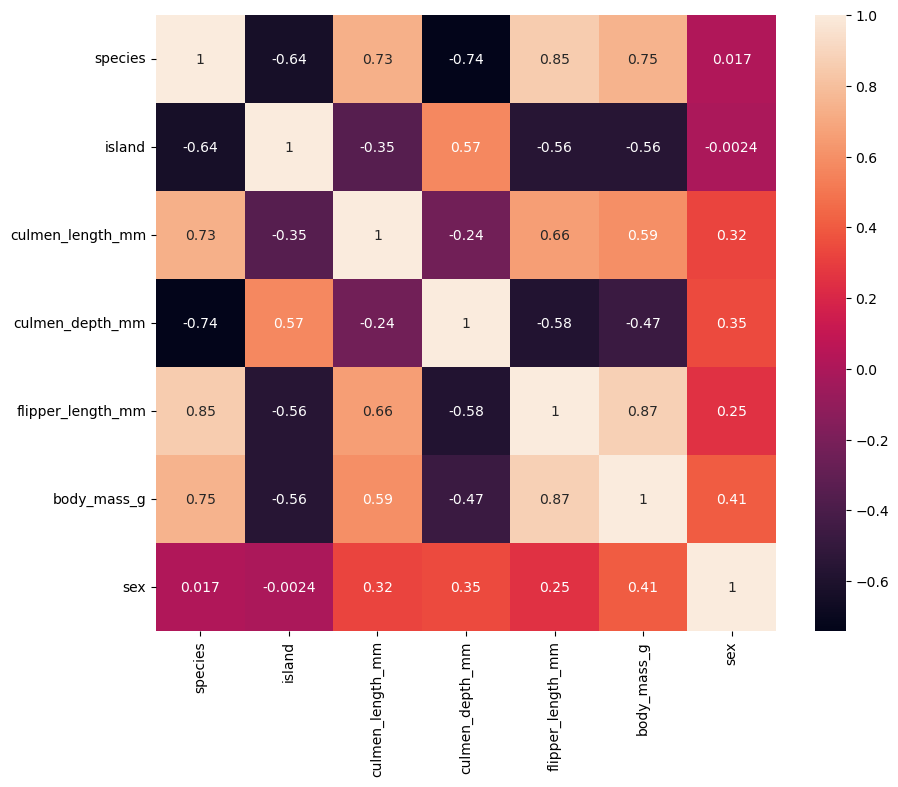

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)

## 9. Split the data into dependent and independent variables.

In [38]:
scaled_x = df.drop(columns=['species'])
scaled_x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


In [39]:
df.species.value_counts()
y = df.species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

## 10. Scaling the data

In [40]:
df.species.value_counts()


0    152
2    124
1     68
Name: species, dtype: int64

In [41]:
mms = MinMaxScaler()

In [42]:
x = p.DataFrame(mms.fit_transform(scaled_x), columns= scaled_x.columns)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,0.5
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,0.5
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


NOTE: From the above cell we can observe that all the data are scaled.

## 11. Split the data into training and testing

In [43]:
tts = train_test_split

In [44]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=0.3,random_state=0)

## 12.check the training and testing data shape.

In [45]:
x_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
219,0.5,0.658182,0.666667,0.440678,0.298611,0.0
271,0.0,0.596364,0.119048,0.813559,0.722222,0.5
266,0.0,0.487273,0.095238,0.644068,0.416667,0.0
335,0.0,0.836364,0.345238,0.983051,0.875000,0.5
217,0.5,0.636364,0.607143,0.355932,0.298611,0.5


In [46]:
x_train.shape

(240, 6)

In [47]:
x_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
141,0.5,0.309091,0.488095,0.254237,0.215278,0.5
6,1.0,0.247273,0.559524,0.152542,0.256944,0.0
60,0.0,0.130909,0.452381,0.220339,0.125000,0.0
249,0.0,0.650909,0.261905,0.813559,0.791667,0.5
54,0.0,0.087273,0.595238,0.254237,0.055556,0.0


In [48]:
x_test.shape

(104, 6)

In [49]:
y_train.head()

219    1
271    2
266    2
335    2
217    1
Name: species, dtype: int32

In [50]:
y_train.shape

(240,)

In [51]:
y_test.head()

141    0
6      0
60     0
249    2
54     0
Name: species, dtype: int32

In [52]:
y_test.shape

(104,)